In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from xgboost import plot_importance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("/home/hybrid/unbalaced_20_80_dataset.csv",index_col=0,low_memory=False)



/root/pydev/py36-venv/lib64/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [17]:
from sklearn import preprocessing 
for f in train.columns: 
    if train[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))
train.fillna((-999), inplace=True) 
train=np.array(train) 
train = train.astype(float) 

In [20]:
Y = train['Label']
X = train.drop("Label",axis=1)

In [21]:
print(train.shape)
print(X.shape)
print(Y.shape)

(7616509, 84)
(7616509, 83)
(7616509,)


In [22]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5103061, 83)
(5103061,)
(2513448, 83)
(2513448,)


In [23]:
%%time
model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=0,n_jobs=-1)
model.fit(X_train, y_train)

CPU times: user 16min 35s, sys: 25.7 s, total: 17min 1s
Wall time: 49.4 s


In [24]:
y_pred = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)
f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
rs=recall_score(y_test,y_pred)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.9989536286408153
f1-acore: 0.996911499789794
confusion matrix:
 [[2086360       4]
 [   2626  424458]]
Precision: 0.9999905763060062
Recall_score: 0.9938513266710999
Misclassified : 2630


In [26]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances[0:10]

,importance
Flow ID,0.212814
Fwd Seg Size Min,0.089639
Timestamp,0.080945
Src IP,0.063830
Fwd Pkt Len Mean,0.061426
Dst IP,0.057134
Fwd Pkt Len Max,0.039168
Fwd Seg Size Avg,0.035354
Init Bwd Win Byts,0.033372
Init Fwd Win Byts,0.024952


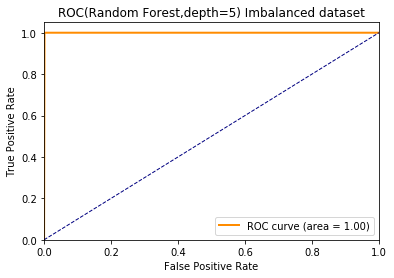

In [27]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(Random Forest,depth=5) Imbalanced dataset')
plt.legend(loc="lower right")
plt.show()